<a href="https://colab.research.google.com/github/yanliu1111/DGT170_AI_Essentials_course_resources/blob/main/survey_data3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries
Import the necessary libraries, including pandas, matplotlib, seaborn, and wordcloud.

In [ ]:
! pip install seaborn

In [1]:
# Import Required Libraries

import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For making statistical graphics
from wordcloud import WordCloud  # For generating word clouds

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Load Dataset
Load the dataset from the CSV file located at /content/surveydata0219.csv using pandas.

In [47]:
# Load Dataset

# Load the dataset from the CSV file
df = pd.read_csv('surveydata0219.csv')
df.head()

# Display the first few rows of the dataframe to ensure it loaded correctly
df.head()

,Start time,Category,age,gender,affliation,experience with AI,programmer experience or not,goals
0,1/31/2025 12:52,1,42,Female,Staff,Beginner,No,Gain a better understanding of AI;Enhance my c...
1,1/31/2025 13:08,1,53,Female,Alumni,Beginner,No,Gain a better understanding of AI;Enhance my c...
2,1/31/2025 13:11,1,43,Male,Continuing Education student,Intermediate,Yes,Gain a better understanding of AI;Enhance my c...
3,1/31/2025 13:11,1,36,Male,Alumni,Beginner,Yes,Gain a better understanding of AI;Improve my j...
4,1/31/2025 13:11,1,29,Female,Alumni,Beginner,No,Gain a better understanding of AI;Improve my j...


# Visualization: Number of People in Each Category
Create a bar chart to show the number of people in each category.

<ipython-input-48-aff672feb98d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


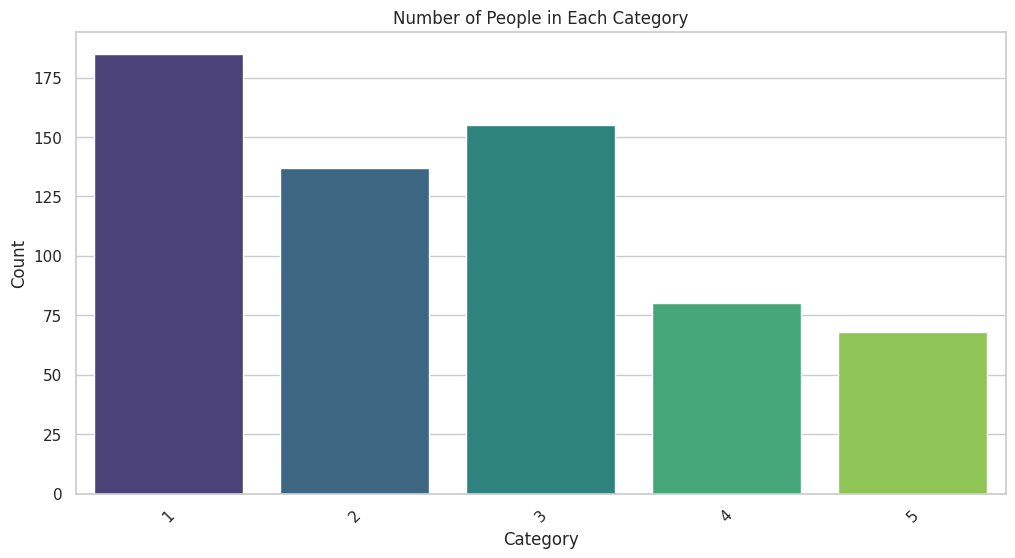

In [48]:
# Visualization: Number of People in Each Category

# Count the number of people in each category
category_counts = df['Category'].value_counts()

# Create a bar chart to show the number of people in each category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Number of People in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization: Programmer with AI within Each Category
Create a grouped bar chart or stacked bar chart to compare the total count of 'programmer with AI' within each category.

<Figure size 1400x700 with 0 Axes>

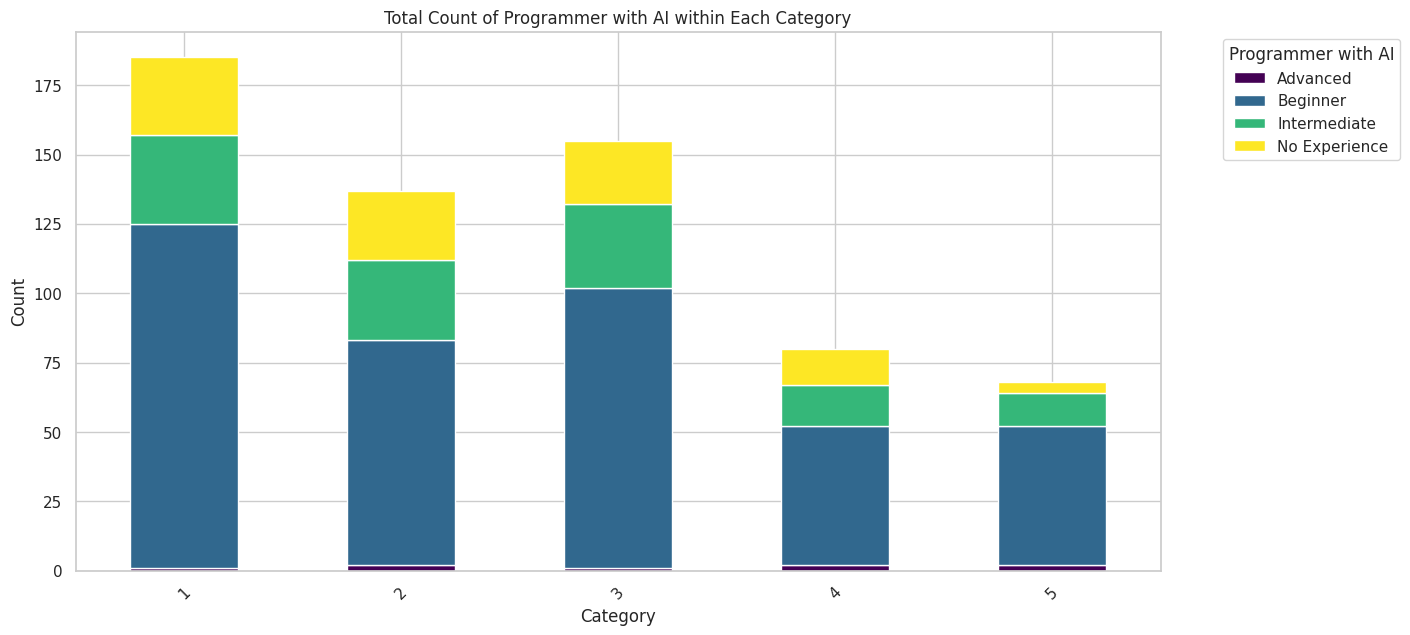

In [49]:
# Visualization: Programmer with AI within Each Category

# Create a grouped bar chart to compare the total count of 'programmer with AI' within each category
plt.figure(figsize=(14, 7))

# Create a crosstab to get the counts of 'programmer with AI' within each category
programmer_category_counts = pd.crosstab(df['Category'], df['experience with AI'])

# Plot the grouped bar chart
programmer_category_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 7))

# Add title and labels
plt.title('Total Count of Programmer with AI within Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Programmer with AI', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Gender and AI Experience Analysis


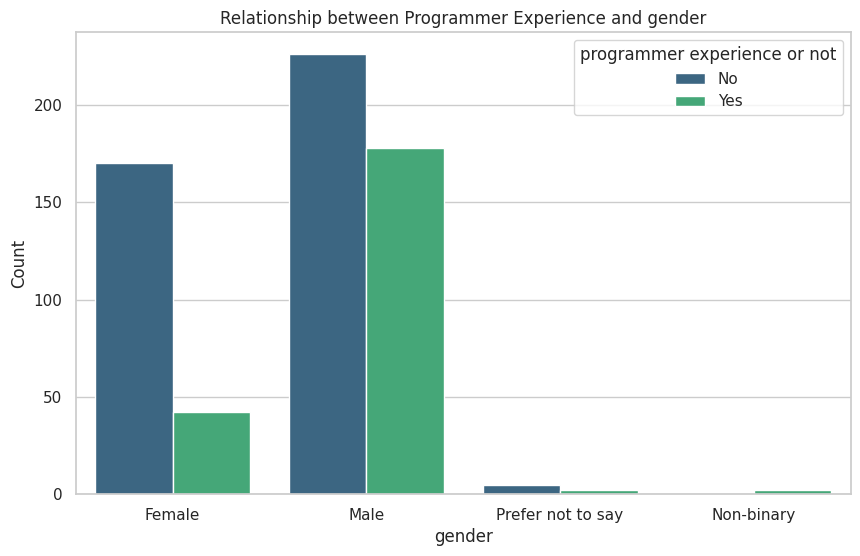

In [50]:
gender_ai_experience_data = pd.crosstab(df['gender'], df['programmer experience or not'])

# Display the crosstab
gender_ai_experience_data

# Create a bar chart to visualize the relationship between 'programmer experience or not' and 'experience with AI'
plt.figure(figsize=(10, 6))
sns.barplot
sns.countplot(x='gender', hue='programmer experience or not', data=df, palette='viridis')
plt.title('Relationship between Programmer Experience and gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

# programmer experience or not and AI Experience Analysis
Replace 'Gender' with 'programmer experience or not' and analyze its relationship with 'experience with AI'. Create a visualization (e.g., a heatmap or bar chart) to show how AI experience is distributed among different AI programming groups.

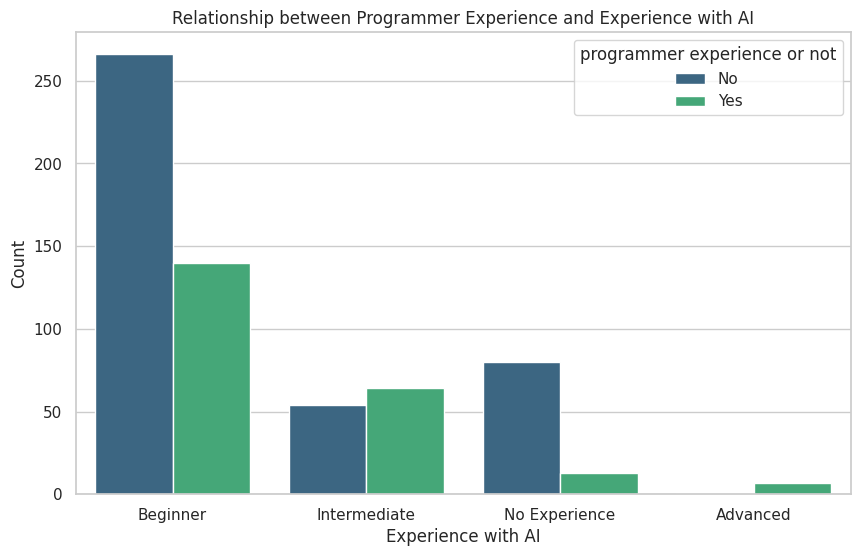

In [51]:
# Gender and AI Experience Analysis

# Replace 'Gender' with 'programmer experience or not' and analyze its relationship with 'experience with AI'
# Create a crosstab to see the distribution
gender_ai_experience_data = pd.crosstab(df['experience with AI'], df['programmer experience or not'])

# Display the crosstab
gender_ai_experience_data

# Create a bar chart to visualize the relationship between 'programmer experience or not' and 'experience with AI'
plt.figure(figsize=(10, 6))
sns.barplot
sns.countplot(x='experience with AI', hue='programmer experience or not', data=df, palette='viridis')
plt.title('Relationship between Programmer Experience and Experience with AI')
plt.xlabel('Experience with AI')
plt.ylabel('Count')
plt.show()

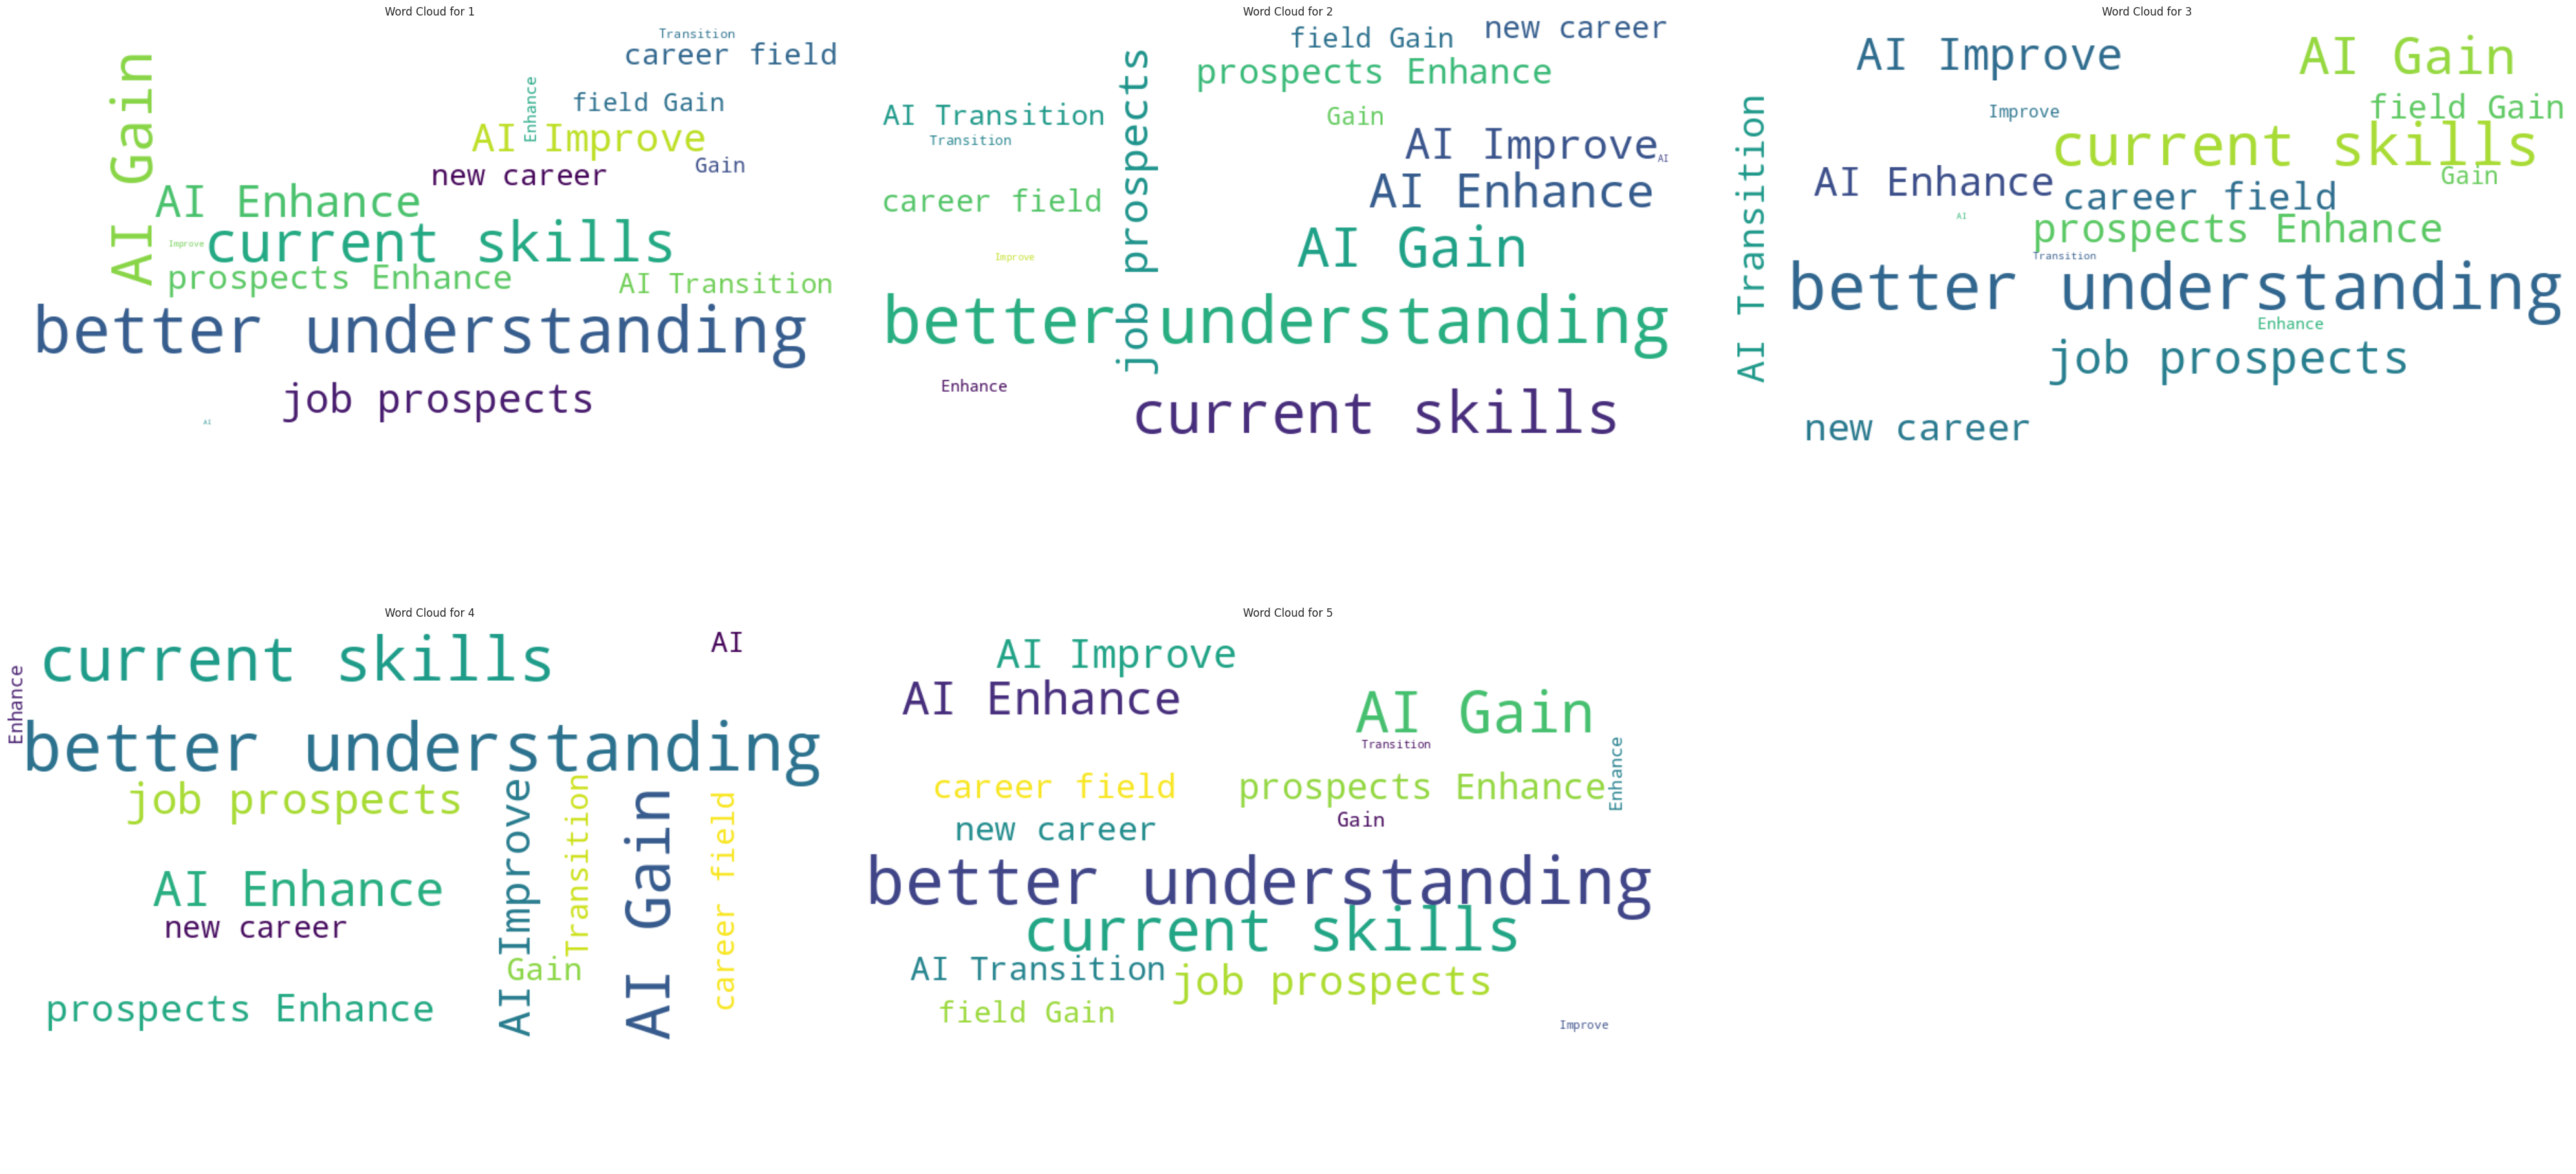

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(text):
    return WordCloud(width=800, height=400, background_color='white').generate(text)

# Generate word clouds for each category
categories = df['Category'].unique()
wordclouds = [generate_wordcloud(' '.join(df[df['Category'] == category]['goals'].dropna())) for category in categories]

# Combine word clouds 2 by 3
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
for i, ax in enumerate(axes.flatten()):
    if i < len(wordclouds):
        ax.imshow(wordclouds[i], interpolation='bilinear')
        ax.set_title(f'Word Cloud for {categories[i]}')
        ax.axis('off')
    else:
        ax.axis('off')  # Hide any extra subplots
plt.tight_layout()
plt.show()